<div class="alert alert-success">
Hey Valentina!
    
    
Such an amazing job! Frankly speaking, I am truly impressed by the progress that you've made. Your best performing model does great job. I would definitely like to take this model and move it to production, since it seems to be so good in churn prediction. Business will benefit a lot from having it.
    
    
The report is clear and neat. Each step is very well explained and described. I ended up with no questions at all after reading it.
    
    
My congratulations on the completion of the program! Your skills now are impressive! Pls, text me when you get a job offer, so we can congratulate it together ;)
    
Best, Anthony
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler 

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,plot_roc_curve,roc_auc_score,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Load and Read Data

In [2]:
try:
    con_df = pd.read_csv('final_provider/contract.csv')
    int_df = pd.read_csv('final_provider/internet.csv')
    pers_df = pd.read_csv('final_provider/personal.csv')
    phon_df = pd.read_csv('final_provider/phone.csv')
except:
    con_df = pd.read_csv('/datasets/final_provider/contract.csv')
    int_df = pd.read_csv('/datasets/final_provider/internet.csv')
    pers_df = pd.read_csv('/datasets/final_provider/personal.csv')
    phon_df = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
def read_file(df):
    """
        Takes dataframe and displays,
            - Summary missing values 
            - Summary duplicated values 
    """
    print()
    display(df.head())
    print('END--')
    print()
    print('INFO:')
    display(df.info())
    print('END--')
    print()
    print('Missing values ratio:')
    display(df.isnull().sum()/df.shape[0])
    print('END--')
    print()
    print('DUPLICATED:')
    display(df.duplicated().sum())
    print('END--')
    print()
    print('DESCRIPTION:')
    display(df.describe())
    print('END--')
   

In [4]:
read_file(con_df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


END--

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

END--

Missing values ratio:


customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

END--

DUPLICATED:


0

END--

DESCRIPTION:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


END--


There are no missing or duplicated columns in the dataset. All columns except for MonthlyCharges are string values. BeginningDate would be converted to datatime format during data preprocessing likewise Totalcharges from string to numeric.

In [5]:
read_file(int_df)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


END--

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

END--

Missing values ratio:


customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

END--

DUPLICATED:


0

END--

DESCRIPTION:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


END--


There are no missing or duplicated values in the dataframe. All columns are of type object. The description summary indicate the values to be binary(yes/no) from the unique count.

In [6]:
read_file(pers_df)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


END--

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

END--

Missing values ratio:


customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

END--

DUPLICATED:


0

END--

DESCRIPTION:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


END--


There are no missing or duplicated values in the dataset. The descriptive summary only provides summary for SeniorCitizen since its the only numeric column in the dataset with minimum value of 0 and maximum 1.

In [7]:
read_file(phon_df)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


END--

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

END--

Missing values ratio:


customerID       0.0
MultipleLines    0.0
dtype: float64

END--

DUPLICATED:


0

END--

DESCRIPTION:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


END--


There are no missing or duplicated values in the dataset. The MultipleLines column has only two unique identifiers (Yes, NO).

## Conclusion

Overall, there are no missing or duplicated values in all four dataframes. Most of the columns values have unique identifiers of either Yes/No. 

# Data Preprocessing

In [8]:
#Convert str(BeginDate) to datetime formate
con_df['BeginDate'] = pd.to_datetime(con_df['BeginDate'])

In [9]:
# convert str(TotalCharges) column to numeric
con_df['TotalCharges'] = con_df['TotalCharges'].apply(pd.to_numeric,errors='coerce')

In [10]:
# Determine any null values after convertion
con_df.isnull().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [11]:
#Fill missing values with Monthly fees
con_df['TotalCharges'] = con_df.TotalCharges.combine_first(con_df.MonthlyCharges)

In [12]:
#change the values in EndDate from No/Date to numeric ones
con_df['EndDate'] = con_df['EndDate'].map(lambda x: 0 if x=='No' else 1)

0    5174
1    1869
Name: EndDate, dtype: int64

CLASS RATIO 3:1 



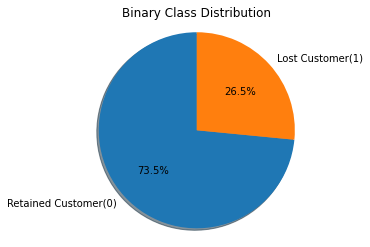

In [13]:
display(con_df.EndDate.value_counts())
# Get the distribution count for each group
retained, lost = con_df.EndDate.value_counts()
# Get class ration 
print('CLASS RATIO {}:{}'.format(int(math.ceil(retained/lost)),int(lost/lost)),'\n')

#plot distribution on a pie chart
plt.pie([retained, lost],labels=['Retained Customer(0)','Lost Customer(1)'],
        autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Binary Class Distribution')
plt.axis('equal')
plt.show()

On average, more than one-forth of customers have canceled there contracts to-date.

In [14]:
con_df.Type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [15]:
# Extract the Year, Month and Day from beginDate
con_df['Month'] = con_df['BeginDate'].dt.month
con_df['Year'] = con_df['BeginDate'].dt.year
con_df['Day'] = con_df['BeginDate'].dt.day

In [16]:
con_sub = {'Type':'Type','PaperlessBilling':'PaperlessBilling',
           'PaymentMethod':'PaymentMethod','MonthlyCharges':'MonthlyCharges',
           'TotalCharges':'TotalCharges',
           'Month':'Month','Year':'Year','Day':'Day'}

def plot_graph(con_df,con_sub=con_sub):
    """ Takes the contract dataframe and selected columns
        Returns a graph relative to Customer retention(EndDate) 
    """
    Retained = con_df[con_df['EndDate']==0]
    Lost = con_df[con_df['EndDate']==1]
    for col, title in con_sub.items():
        plt.hist(Retained[col],alpha=0.5,label=f' Retained {col}')
        plt.hist(Lost[col],alpha=0.5,label=f' Lost {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Count') 
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col} per Customer Turnover(EndDate)')
        plt.legend()
        plt.show()

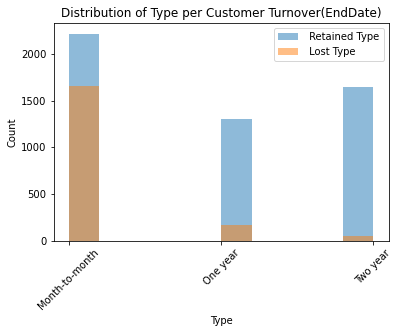

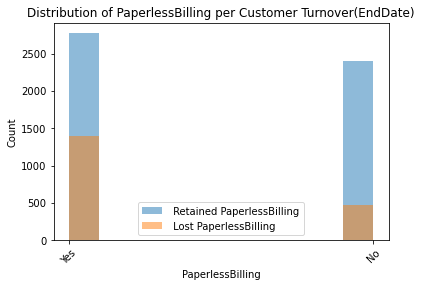

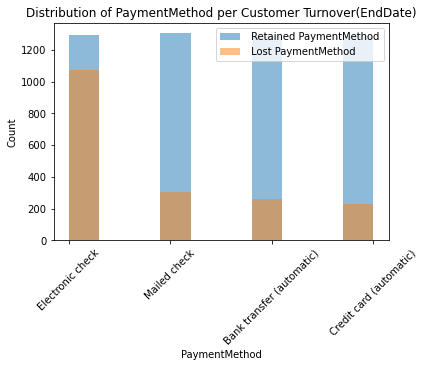

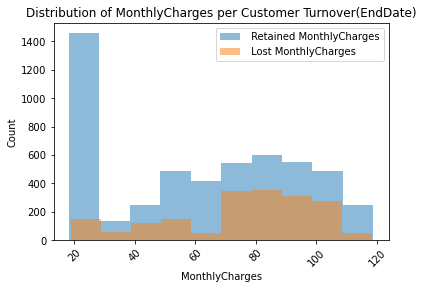

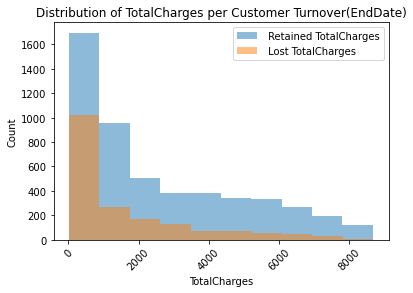

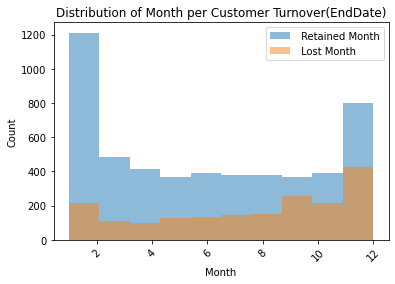

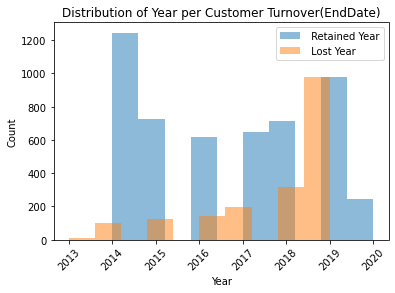

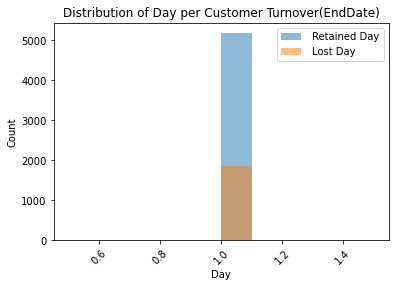

In [17]:
plot_graph(con_df)

The results show by distribution on the selected columns the ratio that have left or still have contract running with the company.
1. Monthly subscribers canceled contracts the most among the three options similarly for those that receive electronic invoices.
2. Those that by with electronic checks canceled their contracts the most.
3. The distribution on monthly charges for retained and lost customers are relatively distributed except for payments between 20 -30.
4. That for Total charges have the similar distributions. 
5. Most customers were lost between 2018-2019.

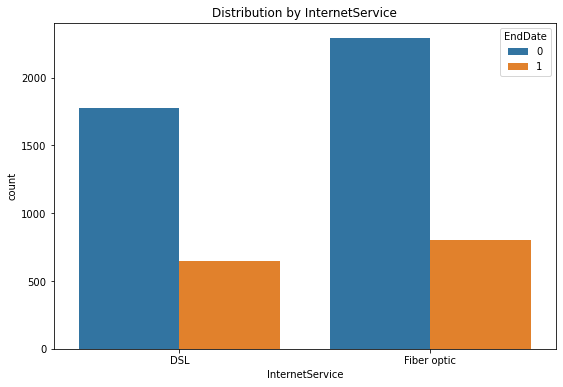

In [18]:
# Countplot to determine the ratio of customers existed by services provided
plt.figure(figsize=(9,6))
sn.countplot(x=int_df['InternetService'],hue=con_df['EndDate'])
plt.title('Distribution by InternetService');

The decision to cancel contract does not seem to be from type of service provision from the graph above.

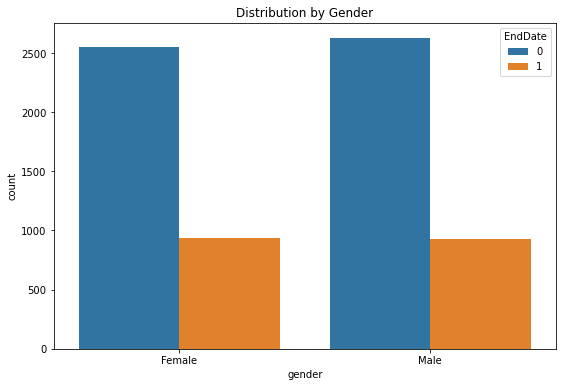

In [19]:
# check for cancelation by gender
plt.figure(figsize=(9,6))
sn.countplot(x=pers_df['gender'],hue=con_df['EndDate'])
plt.title('Distribution by Gender');

Canceled contracts by gender are approximately the same.

In [20]:
#merge all four files on customerID
final_df= (con_df.merge(int_df, how='left',on='customerID')
          .merge(pers_df,how='left', on='customerID')
          .merge(phon_df, how='left', on='customerID'))


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Month             7043 non-null   int64         
 9   Year              7043 non-null   int64         
 10  Day               7043 non-null   int64         
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtection  5517 n

In [22]:
# checking for missing values after merging datasets
final_df.isnull().sum()/final_df.shape[0]

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
Month               0.000000
Year                0.000000
Day                 0.000000
InternetService     0.216669
OnlineSecurity      0.216669
OnlineBackup        0.216669
DeviceProtection    0.216669
TechSupport         0.216669
StreamingTV         0.216669
StreamingMovies     0.216669
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
MultipleLines       0.096834
dtype: float64

In [23]:
# fill missing values with No and null
col = ['OnlineSecurity','OnlineBackup',
       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
final_df[col] = final_df[col].fillna('No')
final_df.InternetService = final_df.InternetService.fillna('Null')

In [24]:
final_df_sub = {'gender':'gender','Type':'Type','SeniorCitizen':'SeniorCitizen',
                'PaperlessBilling':'PaperlessBilling','PaymentMethod':'PaymentMethod',
                'MultipleLines':'MultipleLines','Dependents':'Dependents'}
def plot_graph(final_df,final_df_sub=final_df_sub):
    """ Takes the final dataframe and selected columns
        Returns a graph relative to Customer retention(EndDate) 
    """
    Retained = final_df[final_df['EndDate']==0]
    Lost = final_df[final_df['EndDate']==1]
    for col, title in final_df_sub.items():
        plt.hist(Retained[col],alpha=0.5,label=f' Retained {col}',color='red')
        plt.hist(Lost[col],alpha=0.5,label=f' Lost {col}',color='blue')
        plt.xlabel(f'{col}')
        plt.ylabel('Count') 
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col} per Customer Turnover(EndDate)')
        plt.style.use('ggplot')
        plt.legend()
        plt.show()

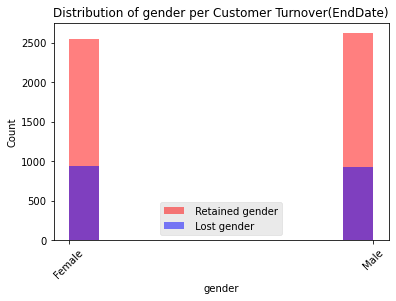

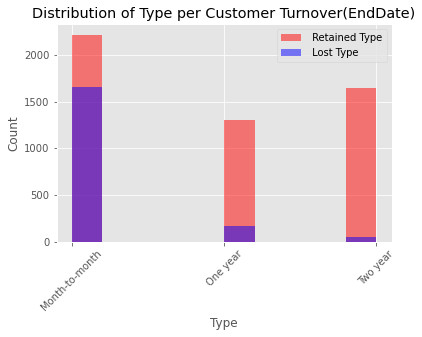

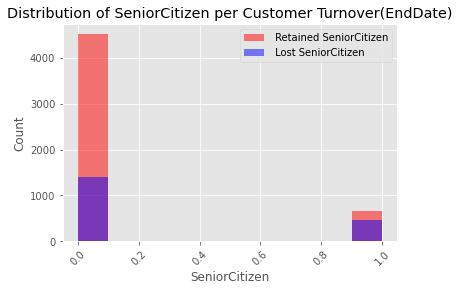

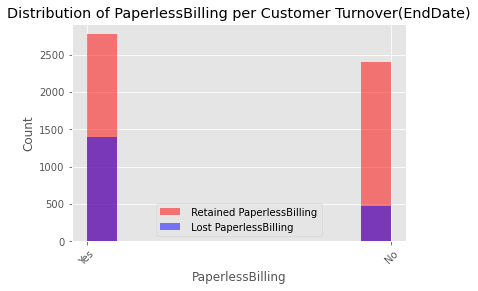

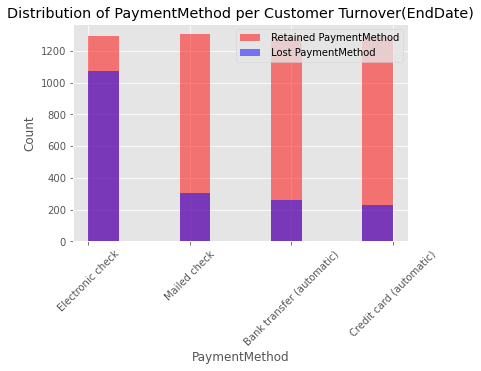

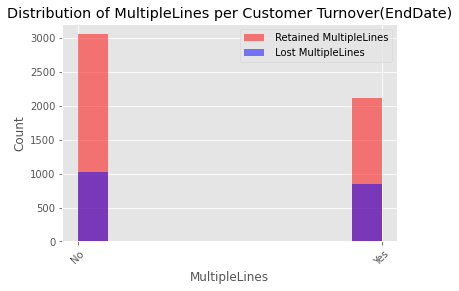

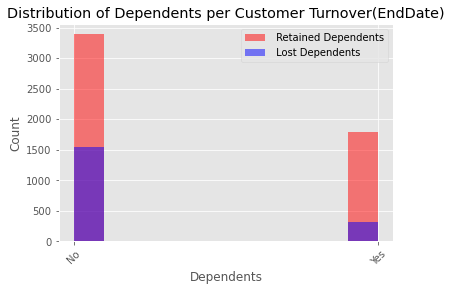

In [25]:
plot_graph(final_df)

The results in relation to retained or lost customers did not change after merging all four files.

## Conclusion

- There is class imbalance of ratio of 3:1.
- Missing values were filled with No for yes/no entries and Null for Internet serves.
- Monthly subscribers canceled their contracts the most among the three options currently being offered. 
- Customers who pay using electronic checks canceled the most their contracts relative to the other options. 

# Prepare Data for training

In [26]:
# replace the yes and no values with numerical ones.
final_df = (final_df.replace(to_replace='No',value=0)
            .replace(to_replace='Yes',value=1))
final_df['gender'] = final_df['gender'].map(lambda x: 1 if x =='Female' else 0)

In [27]:
# Drop the customerID and beginDate 
final_df = final_df.drop(['customerID','BeginDate'],axis=1)

In [28]:
final_df.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Month,Year,Day,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0,Month-to-month,1,Electronic check,29.85,29.85,1,2020,1,DSL,...,1,0,0,0,0,1,0,1,0,0
1,0,One year,0,Mailed check,56.95,1889.50,4,2017,1,DSL,...,0,1,0,0,0,0,0,0,0,0
2,1,Month-to-month,1,Mailed check,53.85,108.15,10,2019,1,DSL,...,1,0,0,0,0,0,0,0,0,0
3,0,One year,0,Bank transfer (automatic),42.30,1840.75,5,2016,1,DSL,...,0,1,1,0,0,0,0,0,0,0
4,1,Month-to-month,1,Electronic check,70.70,151.65,9,2019,1,Fiber optic,...,0,0,0,0,0,1,0,0,0,0


In [29]:
final_df.corr()

,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Month,Year,Day,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
EndDate,1.000000,0.191825,0.193356,-0.198347,0.181417,0.291621,NaN,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.008612,0.150889,-0.150448,-0.164221,0.040102
PaperlessBilling,0.191825,1.000000,0.352150,0.158562,0.024053,-0.019011,NaN,-0.003636,0.126735,0.103797,0.037880,0.223841,0.211716,0.011754,0.156530,-0.014877,-0.111377,0.163530
MonthlyCharges,0.193356,0.352150,1.000000,0.651182,-0.018072,-0.264251,NaN,0.296594,0.441780,0.482692,0.338304,0.629603,0.627429,0.014569,0.220173,0.096848,-0.113890,0.490434
TotalCharges,-0.198347,0.158562,0.651182,1.000000,-0.194330,-0.819517,NaN,0.411679,0.509256,0.522012,0.431910,0.514999,0.520124,0.000087,0.102997,0.317532,0.062124,0.468516
Month,0.181417,0.024053,-0.018072,-0.194330,1.000000,0.081542,NaN,-0.103943,-0.073651,-0.092586,-0.095653,-0.059497,-0.068723,0.003223,0.029381,-0.131669,-0.067989,-0.077022
Year,0.291621,-0.019011,-0.264251,-0.819517,0.081542,1.000000,NaN,-0.316448,-0.359148,-0.357400,-0.314811,-0.284914,-0.289747,0.004386,-0.028418,-0.367419,-0.148000,-0.335494
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,-0.171226,-0.003636,0.296594,0.411679,-0.103943,-0.316448,NaN,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.017021,-0.038653,0.143106,0.080972,0.098108
OnlineBackup,-0.082255,0.126735,0.441780,0.509256,-0.073651,-0.359148,NaN,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.013773,0.066572,0.141498,0.023671,0.202237
DeviceProtection,-0.066160,0.103797,0.482692,0.522012,-0.092586,-0.357400,NaN,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.002105,0.059428,0.153786,0.013963,0.201137


Moderate positive correlation exist between Monthly/TotalCharges and:
- StreamingTv
- StreamMovies
- OnlineSecurity
- Device protection
- Online Backup
- TechSupport

Year has a strong negative correlation with TotalCharges.

In [30]:
cat_final_df = final_df.copy()

In [31]:
# apply get_dummies to convert the categorical columns to numeric ones.
final_df = pd.get_dummies(final_df,drop_first=True)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features are encoded correctly

</div>

In [32]:
target = final_df.EndDate
features = final_df.drop(['EndDate'], axis=1)

In [33]:
# split data into training and test set
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=123)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, test_size=0.2, random_state=123)
display(f'X_train shape: {x_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {x_test.shape}')
display(f'y_test shape: {y_test.shape}')
display(f'X_valid shape: {x_valid.shape}')
display(f'y_valid shape: {y_valid.shape}')


'X_train shape: (4507, 24)'

'y_train shape: (4507,)'

'X_test shape: (1409, 24)'

'y_test shape: (1409,)'

'X_valid shape: (1127, 24)'

'y_valid shape: (1127,)'

In [34]:
# confirm the ratio of the training and the test set 
print(f"Train = {100*len(x_train)/final_df.shape[0]:.2f}%")
print(f"Test = {100*len(x_test)/final_df.shape[0]:.2f}%")
print(f'Valid = {100*len(x_valid)/final_df.shape[0]:.2f}%')

Train = 63.99%
Test = 20.01%
Valid = 16.00%


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test. The proportions are reasonable

</div>

# Model Training

## Logistic Regression 

In [35]:
def display_predict(model, X,y):
    """
        Takes three parameters, 
        The model and the test set.
        Use model and test set to calculate and display results
    """
    print('Accuracy_score:', model.score(X,y))
    print('AUC ROC score:', roc_auc_score(y,model.predict_proba(X)[:,1]))
    print('F1_score:', f1_score(y,model.predict(X)))
    print(classification_report(y,model.predict(X)))
    disp = plot_roc_curve(model, X, y)

In [36]:
def logistic_reg(x_train, y_train, x_valid,y_valid):
    """
        Logistic Regression Model
        Takes four parameters
        Scales the training set 
        Trains and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_train)
    scaler.transform(x_valid)
    lr = LogisticRegression(random_state=1, class_weight='balanced')
    lr.fit(x_train,y_train)
    results = display_predict(lr, x_valid,y_valid)

Accuracy_score: 0.7586512866015972
AUC ROC score: 0.8523224209971199
F1_score: 0.6449086161879894
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       830
           1       0.53      0.83      0.64       297

    accuracy                           0.76      1127
   macro avg       0.73      0.78      0.73      1127
weighted avg       0.82      0.76      0.77      1127



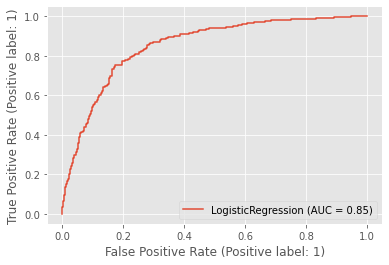

In [37]:
logistic_reg(x_train, y_train, x_valid,y_valid)

## KNeighbors Classifier

Accuracy_score: 0.7963094393186657
AUC ROC score: 0.8209947238128579
F1_score: 0.5722801788375559
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1015
           1       0.69      0.49      0.57       394

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.78      1409



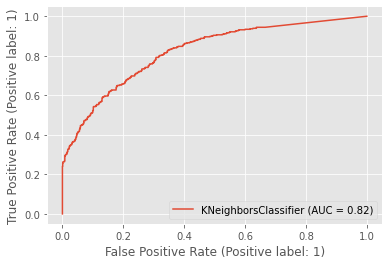

In [38]:
def KNeighbors(x_train, y_train, x_valid,y_valid):
    """
        KNeighbors Classifier Model
        Takes four parameters 
        Trains and displays results
    """
    knn = KNeighborsClassifier(n_neighbors=10,n_jobs=5,weights='distance',)
    knn.fit(x_train,y_train)
    results =display_predict(knn, x_test,y_test)
KNeighbors(x_train, y_train, x_valid,y_valid)

## SVM Model

In [39]:
def svm_model(x_train,y_train,x_valid,y_valid):
    """
        SVM Model
        Takes four parameters
        Scales the training set 
        Trains and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_train)
    scaler.transform(x_test)
    svm_model = SVC(random_state=1,class_weight='balanced',probability=True)
    svm_model.fit(x_train, y_train)
    results =display_predict(svm_model, x_valid,y_valid)

Accuracy_score: 0.6610470275066548
AUC ROC score: 0.6947791164658634
F1_score: 0.46648044692737434
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       830
           1       0.40      0.56      0.47       297

    accuracy                           0.66      1127
   macro avg       0.61      0.63      0.61      1127
weighted avg       0.71      0.66      0.68      1127



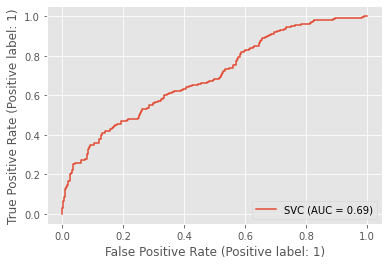

In [40]:
svm_model(x_train,y_train,x_valid,y_valid)

## Decision Tree model

Accuracy_score: 0.8127772848269743
AUC ROC score: 0.7572147174556813
F1_score: 0.6429780033840947
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       830
           1       0.65      0.64      0.64       297

    accuracy                           0.81      1127
   macro avg       0.76      0.76      0.76      1127
weighted avg       0.81      0.81      0.81      1127



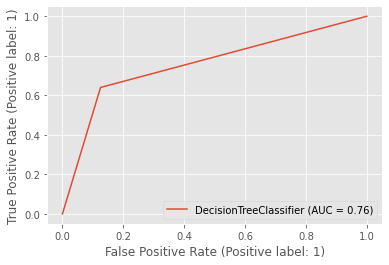

In [41]:
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
tree.fit(x_train,y_train)
results = display_predict(tree, x_valid,y_valid)

## RandomForest 

Accuracy_score: 0.8411712511091393
AUC ROC score: 0.8851223074114641
F1_score: 0.6629001883239171
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       830
           1       0.75      0.59      0.66       297

    accuracy                           0.84      1127
   macro avg       0.81      0.76      0.78      1127
weighted avg       0.83      0.84      0.83      1127



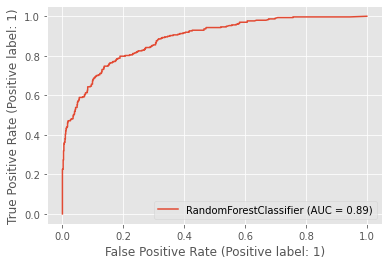

In [42]:
ran_forest = RandomForestClassifier(random_state=1,max_depth=16,n_estimators=200)
ran_forest.fit(x_train, y_train)
results = display_predict(ran_forest, x_valid,y_valid)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|LogisticRegression | 0.85|
|2|KNeighbors | 0.82|
|3|SVM |0.69|
|4|DecisionTree | 0.76|
|5|RandomForest | 0.89|

Of the five models used, RandomForest gave the highest roc_auc score of **0.89**. SVM performed the least among the models trained.

# Fine-Tuning Model

## RandomSampler

Accuracy_score: 0.8339247693399574
AUC ROC score: 0.8809619664424495
F1_score: 0.6794520547945205
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1015
           1       0.74      0.63      0.68       394

    accuracy                           0.83      1409
   macro avg       0.80      0.77      0.78      1409
weighted avg       0.83      0.83      0.83      1409



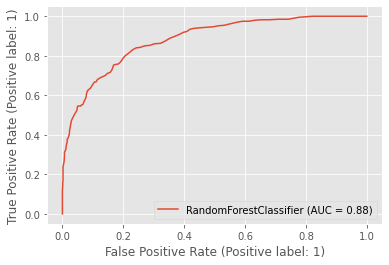

In [43]:
#RandomOverSampler on test set
x_resampled,y_resampled = RandomOverSampler().fit_resample(x_train,y_train)
ran_forest = RandomForestClassifier(random_state=1)
ran_forest.fit(x_resampled,y_resampled)
results = display_predict(ran_forest,x_test,y_test)

## Logistic Regression 

In [44]:
def logistic_reg(x_train, y_train, x_test,y_test):
    """
        Logistic Regression Model
        Takes four parameters
        Scales the training set 
        GridSearchCV extracts the best params 
        Trains model using extarcted params and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_resampled)
    scaler.transform(x_test)
    params = {'penalty': ['l2'], 'max_iter': [150,200]}
    grid_cv = GridSearchCV(LogisticRegression(solver='liblinear',random_state=1), 
                           param_grid=params,scoring='roc_auc',cv=10,refit=True)
    grid_cv.fit(x_resampled,y_resampled)
    best_params= grid_cv.best_params_
    lr = LogisticRegression(**best_params,solver='liblinear',
                            class_weight='balanced').fit(x_resampled,y_resampled)
    results = display_predict(lr, x_test,y_test)

Accuracy_score: 0.752306600425834
AUC ROC score: 0.8469105548748468
F1_score: 0.648539778449144
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1015
           1       0.54      0.82      0.65       394

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.75      0.76      1409



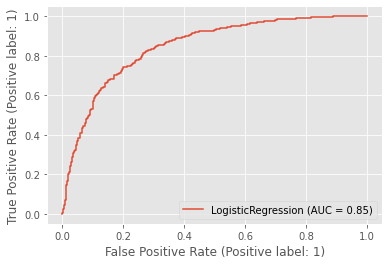

In [45]:
logistic_reg(x_train, y_train, x_test,y_test)

## DecisionTree

Accuracy_score: 0.8133427963094393
AUC ROC score: 0.7960053512040208
F1_score: 0.6716604244694132
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1015
           1       0.66      0.68      0.67       394

    accuracy                           0.81      1409
   macro avg       0.77      0.77      0.77      1409
weighted avg       0.82      0.81      0.81      1409



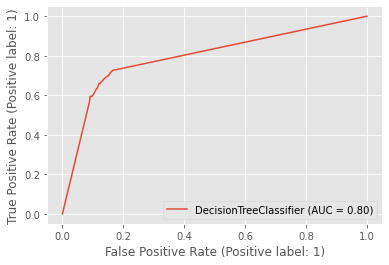

In [46]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[2,4,8,16],
    "min_samples_split":[2],
    "min_samples_leaf":[2],
}
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=1),
                        param_grid=params,scoring='roc_auc', 
                        cv=10,refit=True)
g_cv.fit(x_resampled,y_resampled)
best_params = g_cv.best_params_
tree = DecisionTreeClassifier(**best_params,random_state=1)
tree.fit(x_resampled,y_resampled)
results = display_predict(tree, x_test,y_test)

## RandomForest

In [47]:
def RandomForestClass(x_train, x_test,y_train, y_test):
    """ 
        RandomForestClassifier function.
        GridSearchCV searches and extract the best hyperparameter.
        Results used in training and computing rou_auc.
    """
    params = {
        "criterion":["gini", "entropy"],
        "max_depth":[2,4,8,16],
        "min_samples_split":[2,4,8, 16],
        "min_samples_leaf":[2,4,6]}
    g_cv = GridSearchCV(RandomForestClassifier(random_state=1,class_weight='balanced'),
                        param_grid=params,scoring='roc_auc', 
                        cv=10,refit=True)
    g_cv.fit(x_resampled,y_resampled)
    best_params = g_cv.best_params_
    Ranfo_class = RandomForestClassifier(**best_params,random_state=1).fit(x_resampled,y_resampled)
    results = display_predict(Ranfo_class, x_test,y_test)

Accuracy_score: 0.8239886444286728
AUC ROC score: 0.881835913080443
F1_score: 0.69
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1015
           1       0.68      0.70      0.69       394

    accuracy                           0.82      1409
   macro avg       0.78      0.79      0.78      1409
weighted avg       0.83      0.82      0.82      1409



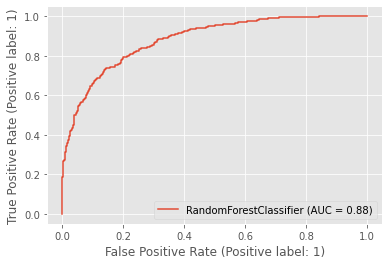

In [48]:
RandomForestClass(x_train, x_test,y_train, y_test)

## Stacking Model

array([0.8498244 , 0.86262534, 0.87881101, 0.88565684, 0.90708505,
       0.87769125, 0.87402657, 0.86854196, 0.85215985, 0.87217987])

Accuracy_score: 0.8183108587650816
AUC ROC score: 0.8692105723787853
F1_score: 0.5775577557755776
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1015
           1       0.83      0.44      0.58       394

    accuracy                           0.82      1409
   macro avg       0.82      0.70      0.73      1409
weighted avg       0.82      0.82      0.80      1409



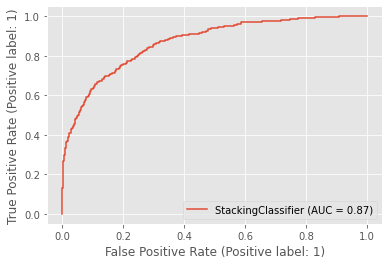

In [49]:
# Creating a stacking model(Randonforest, Kneighbors, GaussianNB and LogisticReg) to improve scores. 
estimators = [
    ('rf', RandomForestClassifier(random_state=1)),
    ('knn',KNeighborsClassifier(n_neighbors=10,weights='distance')),
    ('bayes', GaussianNB())
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(class_weight='balanced',cv=10,
                                       random_state=1,solver='liblinear')
)

clf.fit(x_resampled,y_resampled)
results = display_predict(clf, x_test,y_test)

## XGBoost

In [50]:
def xgb(x_train, x_test,y_train, y_test):
    """
        XGBoost function 
        Get the best params using GridSearchCV
        Train and display results on test set.
    """
    params = {'max_depth': [4,8,16],
              'objective':['binary:logistic'],
              'learning_rate':[0.1]}
    g_cv = GridSearchCV(XGBClassifier(random_state=1),
                        param_grid=params,
                        scoring='roc_auc', cv=5,verbose=False)
    g_cv.fit(x_resampled,y_resampled)
    xgbr = XGBClassifier(**g_cv.best_params_)
    xgbr.fit(x_resampled,y_resampled,eval_set=[(x_test,y_test)],eval_metric='logloss')
    results = display_predict(xgbr, x_test,y_test)

[08:55:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:06] WARNING: /Users/runner/miniforge3/cond

[93]	validation_0-logloss:0.35251
[94]	validation_0-logloss:0.35295
[95]	validation_0-logloss:0.35354
[96]	validation_0-logloss:0.35381
[97]	validation_0-logloss:0.35427
[98]	validation_0-logloss:0.35439
[99]	validation_0-logloss:0.35499
Accuracy_score: 0.8616039744499645
AUC ROC score: 0.9055012377785001
F1_score: 0.737550471063257
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1015
           1       0.79      0.70      0.74       394

    accuracy                           0.86      1409
   macro avg       0.84      0.81      0.82      1409
weighted avg       0.86      0.86      0.86      1409



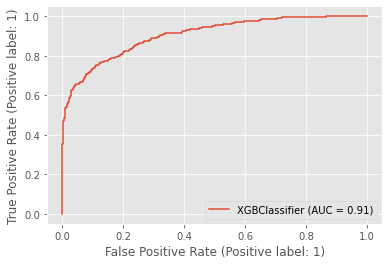

In [51]:
xgb(x_train, x_test,y_train, y_test)

## LightGBM

In [52]:
def Lightgbmclass(x_train,x_test,y_train,y_test):
    """
       LightGMB function
       Extracts the best params using GridSearchCV
       Train and displays results on test set.
    """
    params = {'learning_rate': [0.1],
              'max_depth': [6,8,16],}
    g_cv = GridSearchCV(LGBMClassifier(random_state=1),
                        scoring='roc_auc',
                        param_grid=params, cv=10)
    g_cv.fit(x_resampled,y_resampled)
    lgbm = LGBMClassifier(**g_cv.best_params_)
    lgbm.fit(x_resampled,y_resampled) 
    results = display_predict(lgbm, x_test,y_test)

Accuracy_score: 0.8516678495386799
AUC ROC score: 0.9131879672926408
F1_score: 0.7384230287859824
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1015
           1       0.73      0.75      0.74       394

    accuracy                           0.85      1409
   macro avg       0.81      0.82      0.82      1409
weighted avg       0.85      0.85      0.85      1409



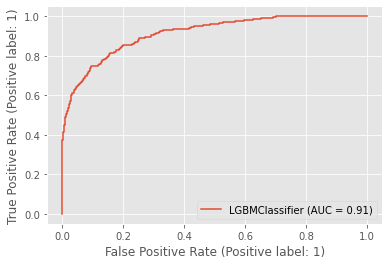

In [53]:
Lightgbmclass(x_train,x_test,y_train,y_test)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|LogisticRegression | 0.85|
|2|DecisionTree | 0.80|
|3|RandomForest | 0.88|
|4|StackingModel | 0.87|
|5|XGBoost | 0.91|
|6|LightGBM | 0.91|

LogisticRegression results did not improve with the additional parameter tuning whiles RandomForest saw its results dropping after. **DecisionTree improved from 0.76 to 0.80** with the parameter tuning.

**XGBoost and LightGBM gave the highest results of 0.91 and 0.91 respectively.**


<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a few different models, tuned their hyperparameters using a cross-validated grid search and evaluated the final models on the test set

</div>

# Sampling

## RandomOverSampler

Accuracy_score: 0.8376220053238687
AUC ROC score: 0.8807086933592957
F1_score: 0.6839378238341969
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       830
           1       0.70      0.67      0.68       297

    accuracy                           0.84      1127
   macro avg       0.79      0.78      0.79      1127
weighted avg       0.84      0.84      0.84      1127



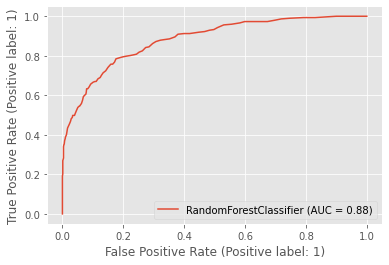

In [54]:
x_resampled,y_resampled = RandomOverSampler().fit_resample(x_train,y_train)
ran_forest = RandomForestClassifier(random_state=1)
ran_forest.fit(x_resampled,y_resampled)
results = display_predict(ran_forest,x_valid,y_valid)

## Downsampling

In [55]:
features_train_norm = x_train
features_train_norm['EndDate'] = y_train
features_train_norm

,PaperlessBilling,MonthlyCharges,TotalCharges,Month,Year,Day,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Dependents,MultipleLines,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_Null,EndDate
1249,0,45.05,45.05,10,2019,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6265,1,45.25,74.20,12,2019,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3772,1,95.00,95.00,9,2019,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3391,0,19.00,73.45,10,2019,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6795,1,85.10,4600.95,7,2015,1,1,1,0,0,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0,91.05,6293.75,3,2014,1,1,1,1,1,...,1,1,0,1,0,0,1,0,0,0
817,1,103.70,5656.75,7,2015,1,0,1,1,1,...,1,0,1,0,0,0,0,1,0,0
901,0,98.30,923.50,3,2019,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
1987,1,89.15,2257.75,12,2017,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1


In [56]:
df_downsampled = resample(features_train_norm[y_train ==0],
                        replace=False,n_samples=features_train_norm[y_train==1].shape[0],
                        random_state=1)
df_downsampled.shape

(1178, 25)

In [57]:
df_train_downsampled = pd.concat([df_downsampled,features_train_norm[y_train==1]])
df_train_downsampled.shape

(2356, 25)

In [58]:
assert df_train_downsampled.query('EndDate==1')['EndDate'].count()==df_train_downsampled.query('EndDate==0')['EndDate'].count()

Accuracy_score: 0.7843833185448092
AUC ROC score: 0.8800231227942071
F1_score: 0.6639004149377594
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       830
           1       0.56      0.81      0.66       297

    accuracy                           0.78      1127
   macro avg       0.74      0.79      0.75      1127
weighted avg       0.83      0.78      0.79      1127



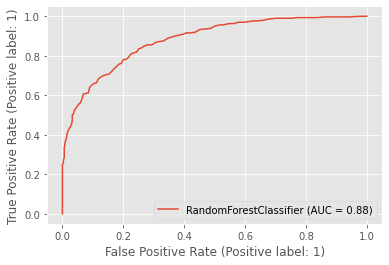

In [59]:
#Train downsampling using RandomForest
ran_forest = RandomForestClassifier(random_state=1)
ran_forest.fit(df_train_downsampled.drop(['EndDate'],axis=1),df_train_downsampled['EndDate'])
results = display_predict(ran_forest,x_valid,y_valid)

## UpSampling

In [60]:
df_upsampled = resample(features_train_norm[y_train ==1],
                        replace=True,n_samples=features_train_norm[y_train==0].shape[0],
                        random_state=1)
df_upsampled.shape

(3329, 25)

In [61]:
df_train_upsampled = pd.concat([df_upsampled,features_train_norm[y_train==0]])
df_train_upsampled.shape

(6658, 25)

In [62]:
assert df_train_upsampled.query('EndDate==1')['EndDate'].count()==df_train_upsampled.query('EndDate==0')['EndDate'].count()

Accuracy_score: 0.8402839396628217
AUC ROC score: 0.8827329520100605
F1_score: 0.6774193548387097
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       830
           1       0.72      0.64      0.68       297

    accuracy                           0.84      1127
   macro avg       0.80      0.77      0.79      1127
weighted avg       0.84      0.84      0.84      1127



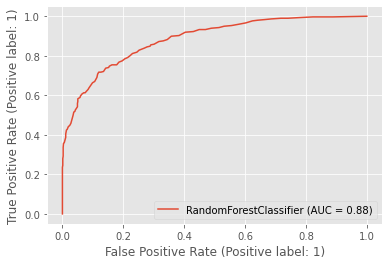

In [63]:
#train upsampling using Randomforest
ran_forest = RandomForestClassifier(random_state=1)
ran_forest.fit(df_train_upsampled.drop(['EndDate'],axis=1),df_train_upsampled['EndDate'])
results = display_predict(ran_forest,x_valid,y_valid)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|RandomOverSampler | 0.89|
|2|DownSampling | 0.88|
|3|UpSampling | 0.88|

The RandomOverSampler gave much better results of 0.89 for both train and test datasets.

# Final Conclusion 
**Data preprocessing**
There were no missing or duplicate values initially in the dataset. Subsequent missing values after merging dataframes were filled in with appropriate values. The beginDate column was changed from string to datatime formate. Missing 
Those of EndDate were change from No(Retained customer) to 0 and Date(Lost customer) to 1. All four datasets were merged and labels encoded from Yes/No to 0/1.

**Finding**
1. Customers monthly bill increased based on their consumption (streamingTV, StreamingMovies,Device Protection,OnlineSecurity, TechSupport had moderate positive correlation with monthly charges).
2. Monthly customers canceled there contracts the most among the three options currently being offered. 
3. Those that pay their bills with electronic checks also canceled their contracts the most compared to the other options.
4. RandomOverSampler gave better results.
5. The best results on ROC_AUC score was from XGBoost and LightGBM of 0.91.

********
Monthly subscribers of Telecom canceled their contracts the most likewise those without dependants. Any targeted promotion should be directed to these customers. Also, attention should be paid to customers that pay using electronic checks to ascertain any concerns/challenges which causes them to cancel their contracts. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great! The project is accepted! Based on your best model's ROC-AUC, you've got 6 SP. Congratulations!

</div>

# Solution Report

Make a report at the end of the Jupyter Notebook with the solution. The team leader will check it. The code will be reviewed by the team leader only if there are some points of doubt.
In the report, please answer the following questions:
1. What steps of the plan were performed and what steps were skipped (explain why)?
2. What difficulties did you encounter and how did you manage to solve them?
3. What were some of the key steps to solving the task?
4. What is your final model and what quality score does it have?

The plan for executing the project was followed to the later. 
Data was preprocessed with new features created(Month, Day, Year) from BeginDate column of contract.csv file. Merged data was then analyzed and split into training, validation and test datasets. 

Several models were build with a best score of 0.91 from LightGBM and XGBoost models. 

||Model|AUC_Score|
|-|---|---|
|1|LogisticRegression | 0.85|
|2|DecisionTree | 0.80|
|3|RandomForest | 0.88|
|4|StackingModel | 0.87|
|5|XGBoost | 0.91|
|6|LightGBM | 0.91|

